<h1> Support Vector Machine </h1>

## Table of Contents
1. [Data Description](#dd)
2. [Loading the packages and dataset](#loading)
3. [Exploratory Data Analysis](#eda)
4. [Splitting the data into Training and Test data](#split)
5. [Building the SVM model](#build)
6. [Predictions from the model](#pred)
7. [Evaluating the model](#eval)
8. [Hyperparameter Tuning](#tuning)
9. [Appendix](#appendix)

### 1. Data Description  <a id='dd'>

The dataset is related to white variants of the Portuguese "Vinho Verde" wine.

Input variables (based on physicochemical tests):
   1. - fixed acidity
   2. - volatile acidity
   3. - citric acid
   4. - residual sugar
   5. - chlorides
   6. - free sulfur dioxide
   7. - total sulfur dioxide
   8. - density
   9. - pH
   10. - sulphates
   11. - alcohol
   
   Output variable (based on sensory data): 
   12. - quality (score between 0 and 10)

**Objective**  <br>
Our goal is to predict the quality of wine based on the features.

### 2. Loading the packages and dataset  <a id='loading'>

In [1]:
# Loading the packages

import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
wines_df = pd.read_csv("winequality-white.csv", sep=';')

In [0]:
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [0]:
wines_df.shape

(4898, 12)

In [0]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [0]:
wines_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in the dataset.

In [0]:
wines_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The standard deviation is changing a lot. There is a lot of variance in the dataset.

### 3. Exploratory Data Analysis   <a id='eda'>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AE28A90>,
      dtype=object)

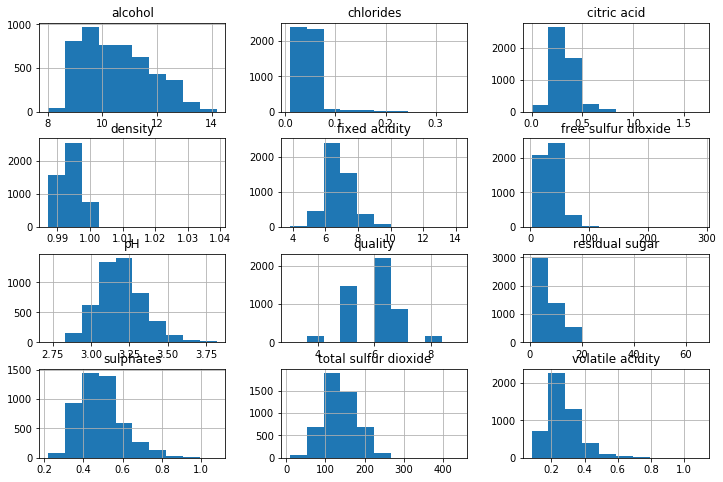

In [0]:
wines_df.hist(figsize=(12,8))

Not all features are normally distributed.  <br>
There is a lot of range difference between **total sulfer dioxide** and **volatile acidity**.
We would need to scale the features.

In [0]:
correlation = wines_df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


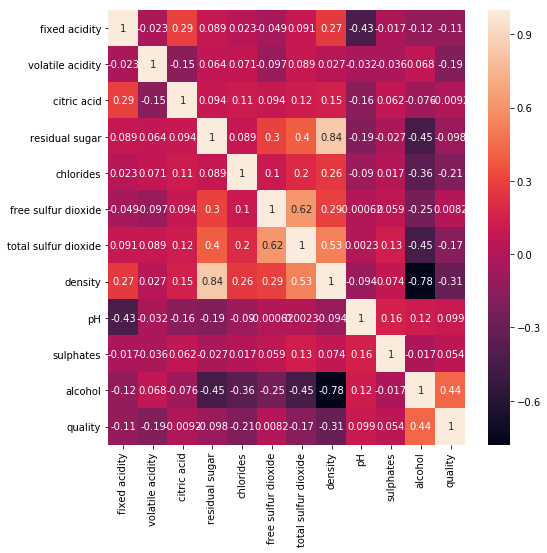

In [0]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True)

Negetive Correlation : fixed acidity and ph, residual sugar and alcohol, density and alcohol.  <br>
Positive Correlation between alcohol and quality, total sulphur dioxide and density, residual sugar and density.

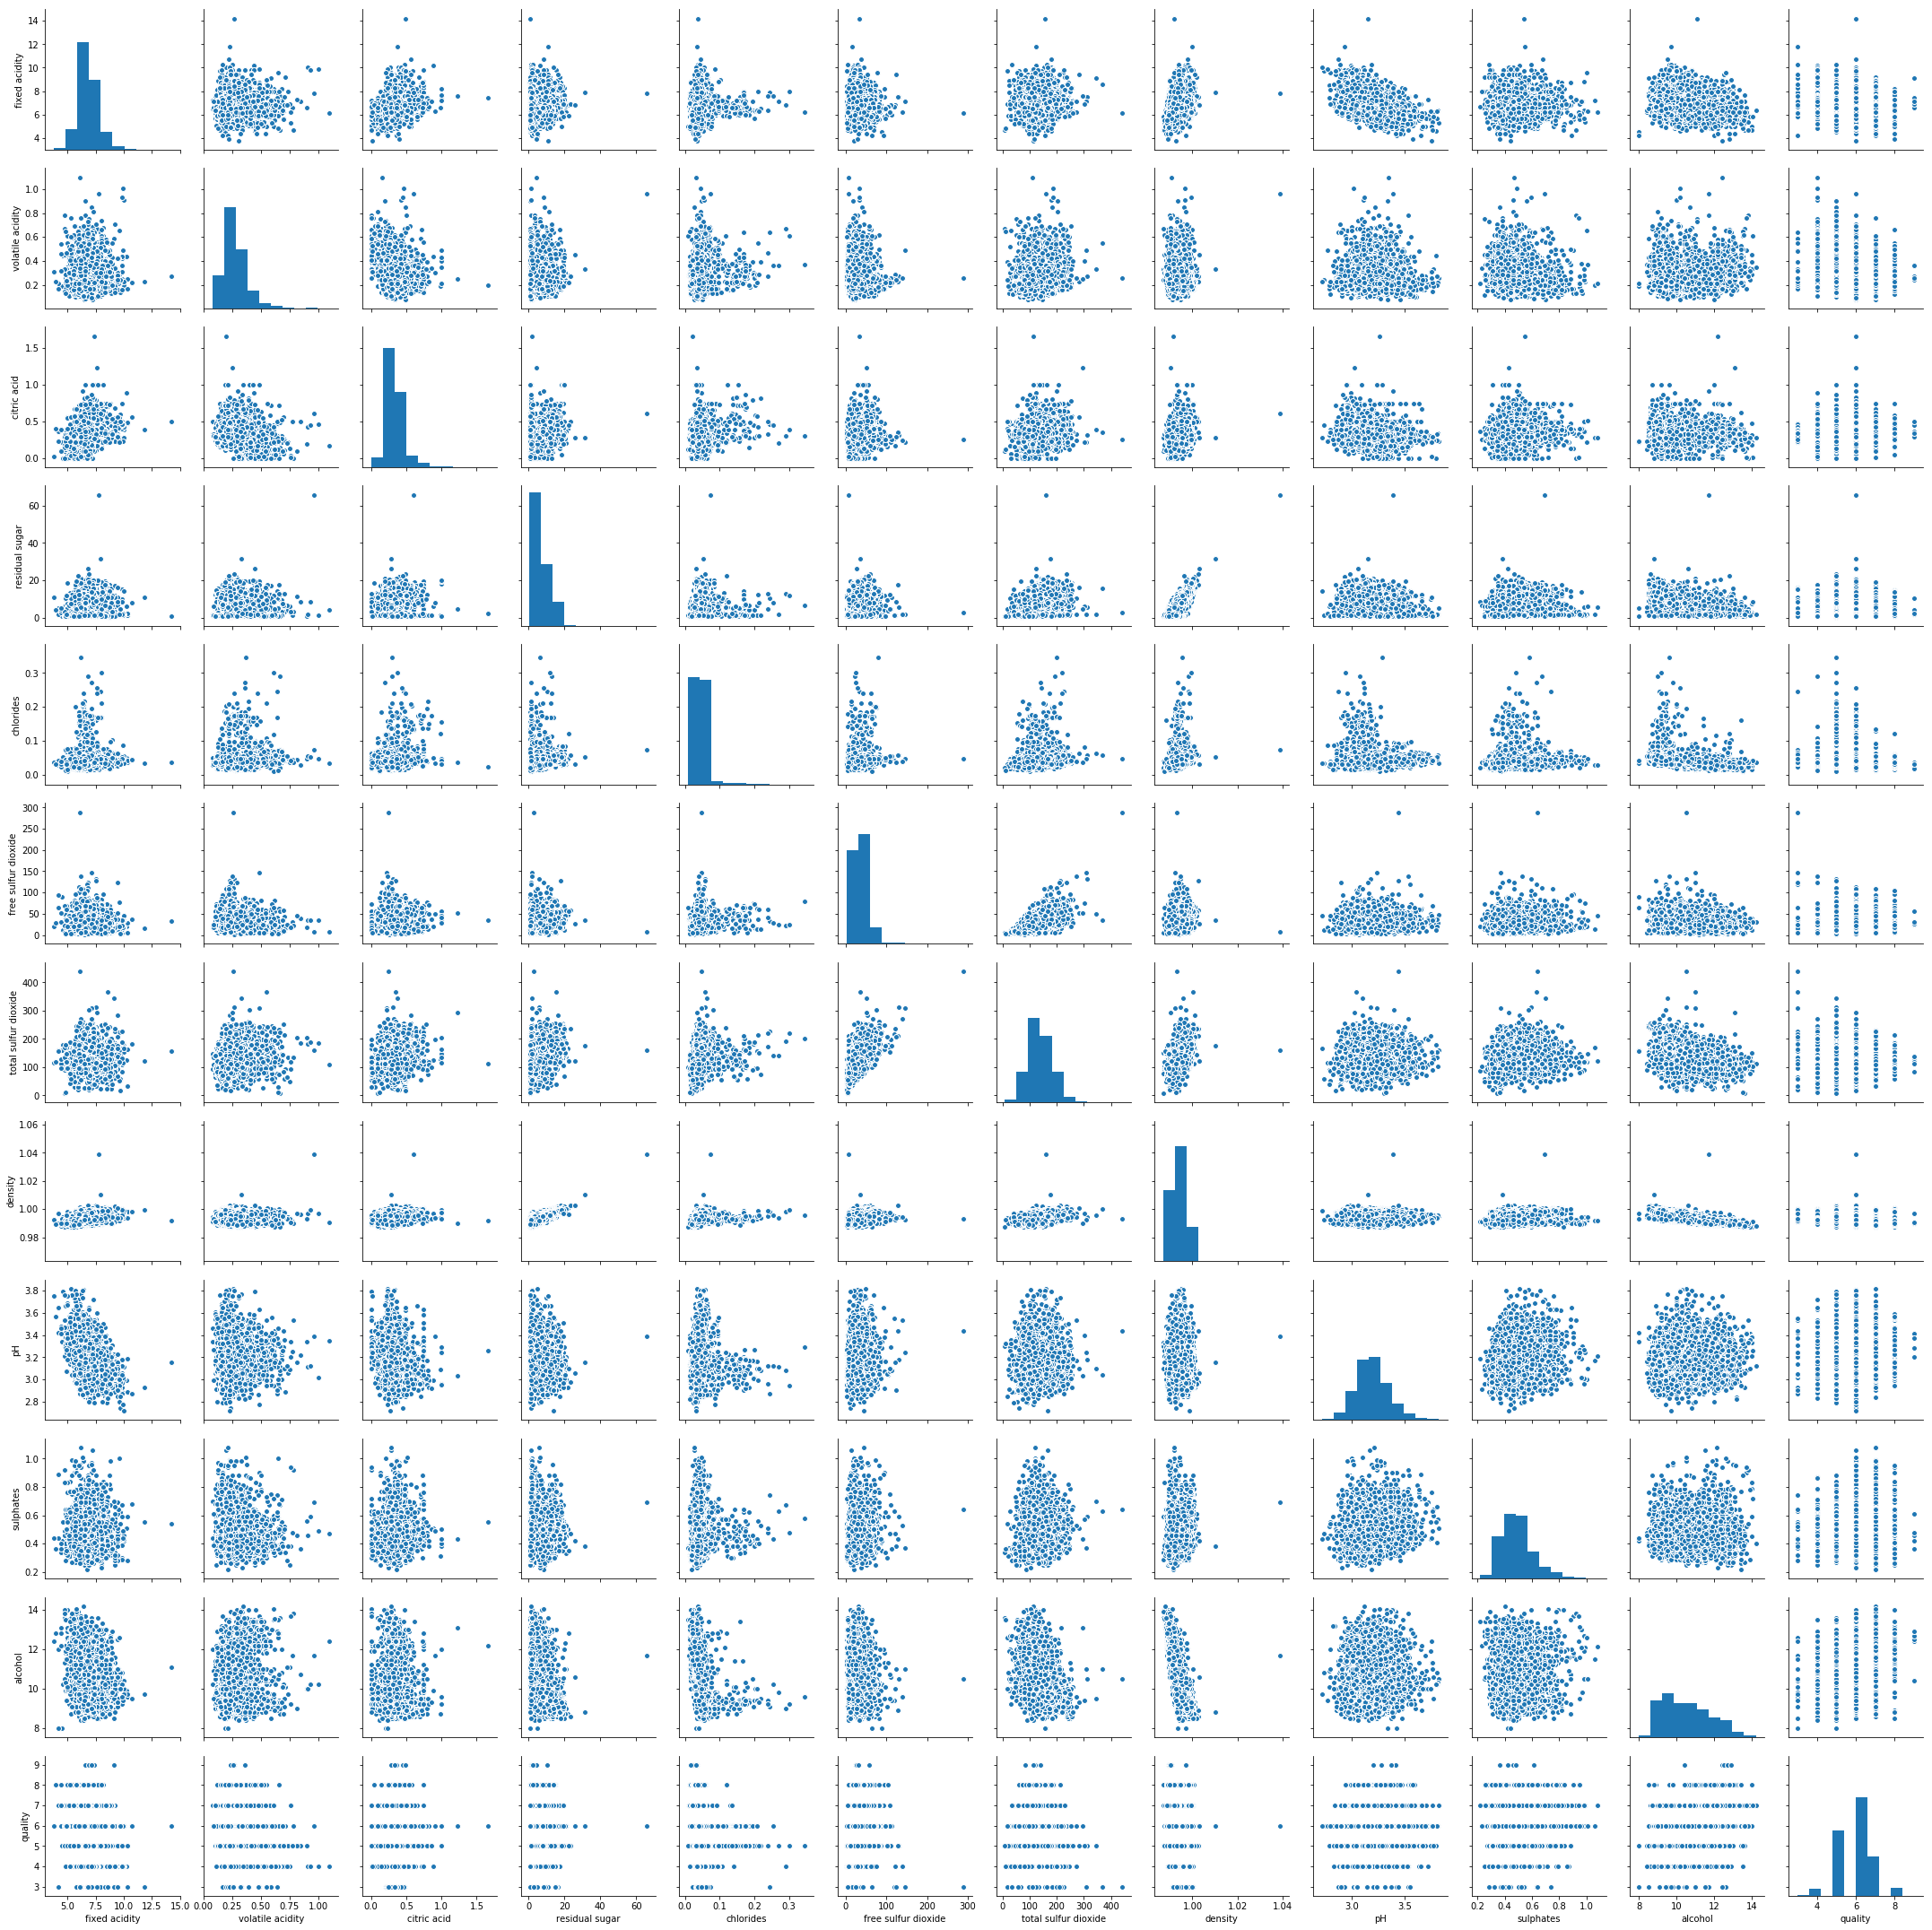

In [0]:
sns.pairplot(wines_df)

Here we can observe the correlation in the scatter plots of the pair of columns.

### 4. Splitting the data in Training and Test data   <a id='split'>

In [0]:
wines_df.shape

(4898, 12)

In [0]:
# Splitting data into label and predictors
y = wines_df["quality"]
X = wines_df.drop("quality", axis=1)

In [0]:
y.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

** Dividing the labels into 3 splits instead of 7 categories **

In [0]:
def quality_cat(y):
    if y >6:
        return 1
    elif 4<y<=6:
        return 0
    else:
        return -1
    
cat_y = y.apply(quality_cat)
cat_y.value_counts()

 0    3655
 1    1060
-1     183
Name: quality, dtype: int64

**1**: Premium quality wine  <br>
**0**: Good quality wine <br>
**-1**: Poor quality wine

We have observed that there is a lot of variance in the data. So we should scale the data using MinMax Scaler

Min Max Scaler reduces the scale according to the following formula
$$ s = \frac {x - x_min}{x_{max} - x_{min}} $$
where s is the output,  <br>
x is the value,  <br>
$x_{min}$ is the minimum value of x in that column,  <br>
$x_{max}$ is the maximum value of x in that column

In [0]:
# Scaling the features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X.values)

** It is highly recommended to scale the data before SVM**

In [0]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, cat_y, test_size=0.25, random_state=42)

### 5. Building the SVM model  <a id='build'>

In [0]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear')
clf.fit(X=X_train,y=y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 6. Predictions from the model  <a id='pred'>

In [0]:
y_pred = clf.predict(X_test)

### 7. Evaluating the model   <a id='eval'>

In [0]:
from sklearn.cross_validation import cross_val_score

score_knn = cross_val_score(clf, X_train, y_train, cv=4)
print("Cross Validation score : " + str(score_knn))
print("Cross Validation Mean score : " + str(score_knn.mean()))

Cross Validation score : [0.74972797 0.74945534 0.74945534 0.74945534]
Cross Validation Mean score : 0.7495234945628595


In [0]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7363265306122448

In [0]:
cr = classification_report(y_test, y_pred)
print(cr)

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00        39
          0       0.74      1.00      0.85       902
          1       0.00      0.00      0.00       284

avg / total       0.54      0.74      0.62      1225



C:\Users\AVINASH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,  39,   0],
       [  0, 902,   0],
       [  0, 284,   0]])

### 8. Hyperparameter Tuning   <a id='tuning'>

In [0]:
# Let's try different kernel like Gaussian kernel 'rbf'
clf2 = SVC(kernel='rbf')
clf2.fit(X=X_train,y=y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
score_knn = cross_val_score(clf2, X_train, y_train, cv=5)
print("Cross Validation score : " + str(score_knn))
print("Cross Validation Mean score : " + str(score_knn.mean()))

Cross Validation score : [0.7486413  0.74965986 0.74965986 0.7493188  0.75034106]
Cross Validation Mean score : 0.7495241794897909


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[  0,  39,   0],
       [  0, 902,   0],
       [  0, 284,   0]])

### 9. Appendix <a id='appendix'>

In [0]:
# Parameters we want to test

Cs = [0.01, 0.1, 1, 10]
gammas = [0.01, 0.1, 1]
#kernels = ['rbf', 'linear']
param_grid = {'C': Cs, 'gamma' : gammas}  # 'kernel' : kernels

In [0]:
# Importing Grid Search 

from sklearn.grid_search import GridSearchCV

In [0]:
# Building the model

grid_clf = SVC(kernel = 'rbf')
grid_search = GridSearchCV(grid_clf, param_grid, cv=3)

In [0]:
grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [0]:
# Best accuracy score

grid_search.best_score_

0.4514087382605145

In [0]:
# Best parameters for the model

grid_search.best_params_

{'C': 10, 'gamma': 1}

The best SVM model can be built with C=10 and gamma=1.  <br>
You can experiment more using kernel = 'linear' and check the score.

### The End